In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Randomly initialize weights and biases for two layers
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_input_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden_output = np.random.rand(1, output_size)

    def forward(self, inputs):
        # Forward pass
        self.hidden_activations = sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_input_hidden)
        self.output_activations = sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output_activations

    def backward(self, inputs, targets, learning_rate):
        # Backward pass (Backpropagation)

        # Calculate error and delta for the output layer
        output_error = targets - self.output_activations
        output_delta = output_error * sigmoid_derivative(self.output_activations)

        # Calculate error and delta for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activations)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

In [8]:
# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training loop
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    predictions = nn.forward(X_train)

    # Backward pass
    nn.backward(X_train, y_train.reshape(-1, 1), learning_rate)

    # Calculate and store the mean squared error for visualization
    loss = mean_squared_error(y_train.reshape(-1, 1), predictions)
    loss_history.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss}")


Epoch 0/1000, Loss: 0.3567279902051153
Epoch 100/1000, Loss: 0.0657884728104482
Epoch 200/1000, Loss: 0.053114528673239514
Epoch 300/1000, Loss: 0.04858166090698347
Epoch 400/1000, Loss: 0.0457581367831534
Epoch 500/1000, Loss: 0.0445598355565501
Epoch 600/1000, Loss: 0.043781506730922605
Epoch 700/1000, Loss: 0.043191999743339
Epoch 800/1000, Loss: 0.0426812690432229
Epoch 900/1000, Loss: 0.04218004761394273


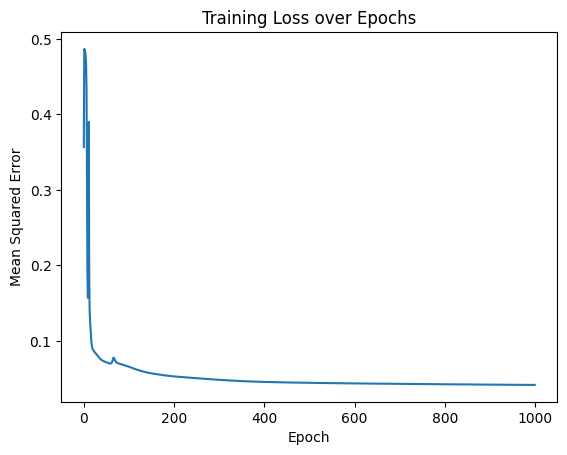

Accuracy: 0.8


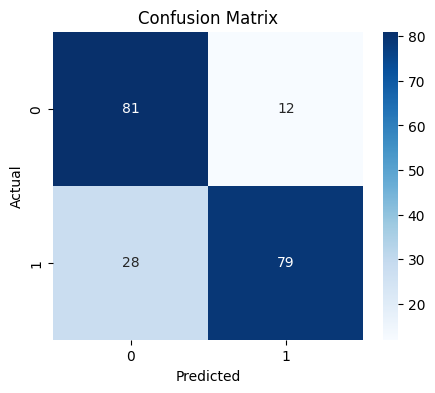

In [9]:

# Plot training loss
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss over Epochs')
plt.show()

# Make predictions on the test set
predictions = nn.forward(X_test)

# Convert predictions to binary values
predictions_binary = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions_binary)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()